<a href="https://colab.research.google.com/github/Athreya99/Analytics/blob/main/MovieRecommedationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sanfernoronha","key":"b6979799ac02284f4d150d8441a1d431"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tmdb/tmdb-movie-metadata

 56% 5.00M/8.89M [00:00<00:00, 40.1MB/s]
100% 8.89M/8.89M [00:00<00:00, 64.4MB/s]


In [ ]:
!mkdir train
!unzip tmdb-movie-metadata.zip -d train

Archive:  tmdb-movie-metadata.zip
  inflating: train/tmdb_5000_credits.csv  
  inflating: train/tmdb_5000_movies.csv  


In [ ]:
import numpy as np
import pandas as pd
import ast #abstract syntax trees
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
movies = pd.read_csv("train/tmdb_5000_movies.csv")
credits = pd.read_csv("train/tmdb_5000_credits.csv.csv")

print("Movies shape {}".format(movies.shape))
print("Credits shape {}".format(credits.shape))

Movies shape (4803, 20)
Credits shape (4803, 4)


In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


###Parsing JSON columns





In [ ]:
def parsing(column, data):
  data[column] = data[column].fillna('[]').apply(ast.literal_eval) # make it a list
  data[column] = data[column].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else []) #iterate over its elements

In [ ]:
def get_director(column, data):
    data[column] = data[column].fillna('[]').apply(ast.literal_eval) # make it a list
    data[column] = data[column].apply(lambda x: [i['name']  for i in x if i['job'] == "Director"] if isinstance(x, list) else []) #iterate over its elements

In [ ]:
parsing('genres', movies)
parsing('production_companies', movies)
parsing('production_countries', movies)
parsing('spoken_languages', movies)
parsing('keywords', movies)
parsing('cast', credits)
get_director('crew', credits)

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


###Renaming movie_id to id and crew to Director

In [ ]:
credits.rename(columns={'movie_id': 'id', 'crew': 'Director'}, inplace=True)

In [ ]:
df = pd.merge(movies, credits.drop(columns=['title']), on="id")

In [ ]:
directors = []
for i in df.index:
    current = df.iloc[i]['Director']
    if(len(current) > 0):
        directors.append(current[0])
    else:
        directors.append(" ")

In [ ]:
df['Director'] = directors
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,Director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton


###Creating dates for EDA

In [ ]:
df.release_date = pd.to_datetime(df.release_date,  errors='coerce')
df['Year'] = df.release_date.dt.year
df['month'] = df.release_date.dt.month
df['weekday'] = df.release_date.dt.weekday

#EDA

###Profits

In [ ]:
df['profit'] = df['revenue'] - df['budget']
df['profit_rate'] = df['profit'] / df['budget']

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,cast,Director,Year,month,weekday,profit,profit_rate
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,2009.0,12.0,3.0,2550965087,10.763566
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,2007.0,5.0,5.0,661000000,2.203333
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,2015.0,10.0,0.0,635674609,2.594590
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,2012.0,7.0,0.0,834939099,3.339756
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,2012.0,3.0,2.0,24139100,0.092843


###Overall budget, profits and revenue over the years

In [ ]:
revenues = df.groupby('Year')['revenue'].sum()
budgets = df.groupby('Year')['budget'].sum()
profits = df.groupby('Year')['profit'].sum()

fig = go.Figure()
fig.add_trace(go.Scatter(x=revenues.index, y=revenues.values,
                    mode='lines',marker_color='blue',name='Revenues'))

fig.add_trace(go.Scatter(x=budgets.index, y=budgets.values,
                    mode='lines',marker_color='red',name='Budgets'))

fig.add_trace(go.Scatter(x=profits.index, y=profits.values,
                    mode='lines',marker_color='green',name='Profits'))

fig.update_layout(title_text='Budget, Profits and revenue over the years')
fig.add_annotation(
            x=2012,
            y=revenues.values.max(),
            text="Peak")

fig.show()

Peak in **2012** with revenue **$24.14 Billion**

Checking movies around that year and a few years after

In [ ]:
twenty_12 = df[df['Year'] == 2012]
twenty_12.sort_values(by="profit", ascending=False)[['title', 'budget', 'revenue', 'profit', 'genres']].head(10)

,title,budget,revenue,profit,genres
16,The Avengers,220000000,1519557910,1299557910,"[Science Fiction, Action, Adventure]"
29,Skyfall,200000000,1108561013,908561013,"[Action, Adventure, Thriller]"
3,The Dark Knight Rises,250000000,1084939099,834939099,"[Action, Crime, Drama, Thriller]"
325,Ice Age: Continental Drift,95000000,877244782,782244782,"[Animation, Comedy, Adventure, Family]"
98,The Hobbit: An Unexpected Journey,250000000,1021103568,771103568,"[Adventure, Fantasy, Action]"
172,The Twilight Saga: Breaking Dawn - Part 2,120000000,829000000,709000000,"[Adventure, Fantasy, Drama, Romance]"
426,The Hunger Games,75000000,691210692,616210692,"[Science Fiction, Adventure, Fantasy]"
146,Madagascar 3: Europe's Most Wanted,145000000,746921274,601921274,"[Animation, Family]"
20,The Amazing Spider-Man,215000000,752215857,537215857,"[Action, Adventure, Fantasy]"
903,Ted,50000000,549368315,499368315,"[Comedy, Fantasy]"


In [ ]:
twenty_14 = df[df['Year'] == 2014]
twenty_14.sort_values(by="profit", ascending=False)[['title', 'budget', 'revenue', 'profit', 'genres']].head(10)

,title,budget,revenue,profit,genres
36,Transformers: Age of Extinction,210000000,1091405097,881405097,"[Science Fiction, Action, Adventure]"
19,The Hobbit: The Battle of the Five Armies,250000000,956019788,706019788,"[Action, Adventure, Fantasy]"
200,The Hunger Games: Mockingjay - Part 1,125000000,752100229,627100229,"[Science Fiction, Adventure, Thriller]"
94,Guardians of the Galaxy,170000000,773328629,603328629,"[Action, Science Fiction, Adventure]"
81,Maleficent,180000000,758539785,578539785,"[Fantasy, Adventure, Action, Family, Romance]"
85,Captain America: The Winter Soldier,170000000,714766572,544766572,"[Action, Adventure, Science Fiction]"
82,Dawn of the Planet of the Apes,170000000,710644566,540644566,"[Science Fiction, Action, Drama, Thriller]"
95,Interstellar,165000000,675120017,510120017,"[Adventure, Drama, Science Fiction]"
38,The Amazing Spider-Man 2,200000000,705717432,505717432,"[Action, Adventure, Fantasy]"
46,X-Men: Days of Future Past,250000000,747862775,497862775,"[Action, Adventure, Fantasy, Science Fiction]"


Movies with high profits seem to also be having a high budget. Checking the relationship between the two

In [ ]:
fig = px.scatter(df, x="budget", y="revenue", trendline="ols", title="Relationship between Budget and Revenue")
fig.update_layout(xaxis_title="Budget",
                 yaxis_title="Revenue")
fig.show()

As budget increases, profits mostly increase

###Top 10

In [ ]:
def get_most_10(data, column):
    temp_data = data.apply(lambda x: pd.Series(x[column], dtype='object'),axis=1).stack().reset_index(level=1, drop=True)
    a = temp_data.value_counts().reset_index()
    a.rename(columns={0: 'Value'})
    fig = px.bar(a.iloc[:10][::-1], x=0, y='index', orientation='h', title="Top 10 {}".format(column),color_discrete_sequence=['#707B7C '])
    fig.show()

In [ ]:
get_most_10(df, 'genres')

Drama, comdey and thrillers top the list

In [ ]:
get_most_10(df, 'cast')

Samuel L. Jackson, Robert De Niro and Bruce Willis are some the top actors appearing in most movies

In [ ]:
get_most_10(df, 'production_countries')

Most movies are produced in USA, UK and Germany

In [ ]:
days = df.groupby('weekday')['title'].count()
days_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]
fig = go.Figure()
fig.add_trace(go.Bar(y=days_names[::-1], x=days.values[::-1],name='Number of Movies in Days', orientation='h'))
fig.update_layout(title_text='Number of Movies in Days',
                 xaxis_title="Number of Movies",
                 yaxis_title="Week Days",
                 plot_bgcolor='white')
fig.show()

Most movies releasing on Fridays

##Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Load the dataset
df = pd.read_csv('train/tmdb_5000_movies.csv')

In [ ]:
# Preprocess the data
df = df[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']]
df.dropna(inplace=True)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

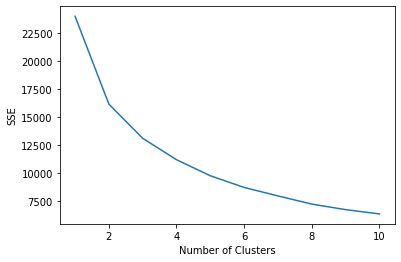

In [ ]:
# Select the number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Train the model
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)
labels = kmeans.labels_

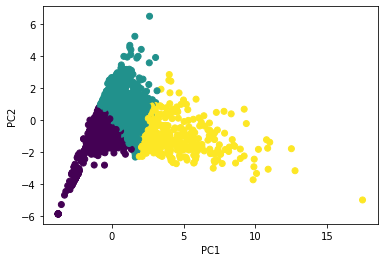

In [ ]:
# Visualize the results
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

The scatter plot shows the distribution of the movies in the 2D space defined by the first two principal components. Each point on the plot represents a movie, and its color represents the cluster it belongs to. We can see that the movies have been grouped into three clusters, with each cluster having a distinct color. The clustering appears to have grouped movies with similar budget, revenue, runtime, vote average, and vote count together

##Recommender Systems

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [ ]:
df_raw = pd.read_csv('train/tmdb_5000_movies.csv')
print(df_raw.shape)
print(df_raw.columns)
df_raw.sample(n=15, replace=False, random_state=1)

(4803, 20)
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1986,24000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",http://www.fasterthemovie.com/,41283,[],en,Faster,Driver (Dwayne Johnson) has spent the last 10 ...,26.324874,"[{""name"": ""Castle Rock Entertainment"", ""id"": 9...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-23,23081726,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Slow Justice is no Justice,Faster,6.1,568
2657,15000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://shinjukuincident.emp.hk/,20083,"[{""id"": 12422, ""name"": ""drug stealing""}, {""id""...",zh,新宿事件,"Iron Zhao aka Steelhead, a truck repairman fro...",5.294319,"[{""name"": ""JCE Movies"", ""id"": 5649}]","[{""iso_3166_1"": ""HK"", ""name"": ""Hong Kong""}]",2009-03-22,0,119.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,They destroyed his life... Now he'll destroy t...,Shinjuku Incident,6.7,65
4214,2000000,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,10758,"[{""id"": 828, ""name"": ""waitress""}, {""id"": 8650,...",en,Waitress,"Jenna is a pregnant, unhappily married waitres...",9.672990,"[{""name"": ""Night and Day Pictures"", ""id"": 24133}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-25,22179430,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,If only life were as easy as pie,Waitress,6.7,129
4326,1100000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://www.sonyclassics.com/theraid/,94329,"[{""id"": 9730, ""name"": ""crime boss""}, {""id"": 14...",id,Serbuan maut,Deep in the heart of Jakarta's slums lies an i...,40.285095,"[{""name"": ""Celluloid Dreams"", ""id"": 860}, {""na...","[{""iso_3166_1"": ""ID"", ""name"": ""Indonesia""}, {""...",2011-09-08,4105187,101.0,"[{""iso_639_1"": ""id"", ""name"": ""Bahasa indonesia""}]",Released,"1 Ruthless Crime Lord, 20 Elite Cops, 30 Floor...",The Raid,7.3,1055
1524,32000000,"[{""id"": 12, ""name"": ""Adventure""}]",NaN,5494,"[{""id"": 1400, ""name"": ""swordplay""}, {""id"": 170...",en,George and the Dragon,A knight returning from the Crusades takes on ...,4.120549,"[{""name"": ""Carousel Picture Company"", ""id"": 89...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2004-03-28,0,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,George and the Dragon,5.0,13
3752,5000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",NaN,146203,"[{""id"": 163053, ""name"": ""found footage""}]",en,The Last Exorcism Part II,As Nell Sweetzer tries to build a new life aft...,10.605752,"[{""name"": ""StudioCanal"", ""id"": 694}, {""name"": ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-02-28,15179302,88.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The second coming,The Last Exorcism Part II,4.4,203
796,60000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 37, ""nam...",http://www.netflix.com/title/80039517,347969,"[{""id"": 155573, ""name"": ""wild west""}]",en,The Ridiculous 6,"When his long-lost outlaw father returns, Tomm...",19.694695,"[{""name"": ""Happy Madison Productions"", ""id"": 2...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-12-11,0,119.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Ridiculous 6,4.9,388
1802,26000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 14, ""nam...",NaN,8011,"[{""id"": 233, ""name"": ""japan""}, {""id"": 242, ""na...",en,Highlander III: The Sorcerer,"Starts off in the 15th century, with Connor Mc...",7.964451,"[{""name"": ""Trans-Film"", ""id"": 2662}, {""name"": ...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",1994-11-29,36800000,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Throughout time they have 

In [ ]:
df_credits = pd.read_csv("train/tmdb_5000_credits.csv")
# df_raw = df_raw.drop(['Column1','Column2','Column3','Column4'], axis=1)
print(df_credits.shape)
print(df_credits.columns)
df_credits.sample(n=15, replace=False, random_state=1)

(4803, 4)
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


,movie_id,title,cast,crew
1986,41283,Faster,"[{""cast_id"": 20, ""character"": ""Driver"", ""credi...","[{""credit_id"": ""5505696c9251412c05002719"", ""de..."
2657,20083,Shinjuku Incident,"[{""cast_id"": 1, ""character"": ""Steelhead"", ""cre...","[{""credit_id"": ""52fe43d6c3a368484e001107"", ""de..."
4214,10758,Waitress,"[{""cast_id"": 15, ""character"": ""Jenna"", ""credit...","[{""credit_id"": ""52fe43b09251416c7501a461"", ""de..."
4326,94329,The Raid,"[{""cast_id"": 11, ""character"": ""Rama"", ""credit_...","[{""credit_id"": ""52fe49529251416c750c441d"", ""de..."
1524,5494,George and the Dragon,"[{""cast_id"": 12, ""character"": ""George"", ""credi...","[{""credit_id"": ""52fe4409c3a36847f807e8db"", ""de..."
3752,146203,The Last Exorcism Part II,"[{""cast_id"": 1, ""character"": ""Nell Sweetzer"", ...","[{""credit_id"": ""52fe4b779251416c75103b75"", ""de..."
796,347969,The Ridiculous 6,"[{""cast_id"": 3, ""character"": ""Tommy aka White ...","[{""credit_id"": ""5679392c925141118700256c"", ""de..."
1802,8011,Highlander: The Final Dimension,"[{""cast_id"": 1, ""character"": ""Connor 'The High...","[{""credit_id"": ""53f635eac3a36833f400402f"", ""de..."
2498,12410,Good,"[{""cast_id"": 2, ""character"": ""Halder"", ""credit...","[{""credit_id"": ""52fe44dd9251416c75043a39"", ""de..."
3093,15394,Owning Mahowny,"[{""cast_id"": 1, ""character"": ""Dan Mahowny"", ""c...","[{""credit_id"": ""556c9a9fc3a3685931001740"", ""de..."


###Merging the data

In [ ]:
df_raw=df_raw.merge(df_credits,on='title')
df_raw.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


###Removing the unnecessary columns
All the columns were not necessary to recommend a movie
For example:
*   movie budget is not important for a recommender system
*   Home Page of the movie is not necessary

So we have considered only the required columns into new data frame


In [ ]:
df_raw=df_raw[['movie_id','title','overview','genres','keywords','production_companies','cast','crew']]
df_raw.head()

,movie_id,title,overview,genres,keywords,production_companies,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


###Removing Null values

In [ ]:
df_raw.isnull().sum()

movie_id                0
title                   0
overview                3
genres                  0
keywords                0
production_companies    0
cast                    0
crew                    0
dtype: int64

In [ ]:
df_raw.dropna(inplace=True)

In [ ]:
df_raw.duplicated().sum()

0

###Column Conversion
We will use the literal_eval function from the ast (Abstract Syntax Tree) library to create functions to parse through the necessary columns in order to retrieve the necessary attributes for our system.

Genre Column

In [ ]:
df_raw['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
import ast
def convert(obj):
    li=[]
    for i in ast.literal_eval(obj): #The literal_eval function is a function that evaluates a string containing a Python literal and returns the corresponding Python object


        li.append(i['name'])
    return li

In [ ]:
df_raw['genres']=df_raw['genres'].apply(convert)
df_raw['genres'][0:6]

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
5                     [Fantasy, Action, Adventure]
Name: genres, dtype: object

Keywords Column

In [ ]:
df_raw['keywords'] = df_raw['keywords'].apply(convert)
df_raw['keywords'][0:6]

0    [culture clash, future, space war, space colon...
1    [ocean, drug abuse, exotic island, east india ...
2    [spy, based on novel, secret agent, sequel, mi...
3    [dc comics, crime fighter, terrorist, secret i...
4    [based on novel, mars, medallion, space travel...
5    [dual identity, amnesia, sandstorm, love of on...
Name: keywords, dtype: object

Production Companies Column

In [ ]:
def convert_prod(obj) :
    li=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter < 4:
            li.append(i['name'])
            counter+=1

    return li

In [ ]:
df_raw['production_companies'] = df_raw['production_companies'].apply(convert_prod)
df_raw['production_companies'][0:6]

0    [Ingenious Film Partners, Twentieth Century Fo...
1    [Walt Disney Pictures, Jerry Bruckheimer Films...
2                     [Columbia Pictures, Danjaq, B24]
3    [Legendary Pictures, Warner Bros., DC Entertai...
4                               [Walt Disney Pictures]
5    [Columbia Pictures, Laura Ziskin Productions, ...
Name: production_companies, dtype: object

Cast Column

In [ ]:
df_raw['cast'][0][:500]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "c'

In [ ]:
def convert_cast(obj) :
    li=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter < 3:
            li.append(i['name'])
            counter=+1
    return li

In [ ]:
df_raw['cast']=df_raw['cast'].apply(convert_cast)
df_raw['cast'][0:6]

0    [Sam Worthington, Zoe Saldana, Sigourney Weave...
1    [Johnny Depp, Orlando Bloom, Keira Knightley, ...
2    [Daniel Craig, Christoph Waltz, Léa Seydoux, R...
3    [Christian Bale, Michael Caine, Gary Oldman, A...
4    [Taylor Kitsch, Lynn Collins, Samantha Morton,...
5    [Tobey Maguire, Kirsten Dunst, James Franco, T...
Name: cast, dtype: object

Crew Columns

In [ ]:
def convert_crew(obj):
    crew_set=set()
    crew_list = []

    for i in ast.literal_eval(obj):
        if i['job'] in ['Director' ,'Screenplay','Producer']:
            name=i['name']
            if name not in crew_set:
                crew_set.add(name)
                crew_list.append(name)

    return crew_list

In [ ]:
df_raw['crew']=df_raw['crew'].apply(convert_crew)
df_raw['crew'][0:6]

0                          [James Cameron, Jon Landau]
1    [Gore Verbinski, Jerry Bruckheimer, Ted Elliot...
2    [Sam Mendes, John Logan, Barbara Broccoli, Rob...
3    [Charles Roven, Christopher Nolan, Jonathan No...
4    [Andrew Stanton, Colin Wilson, Jim Morris, Lin...
5    [Sam Raimi, Laura Ziskin, Avi Arad, Alvin Sarg...
Name: crew, dtype: object

In [ ]:
df_raw.head()

,movie_id,title,overview,genres,keywords,production_companies,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[James Cameron, Jon Landau]"
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Gore Verbinski, Jerry Bruckheimer, Ted Elliot..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Sam Mendes, John Logan, Barbara Broccoli, Rob..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Legendary Pictures, Warner Bros., DC Entertai...","[Christian Bale, Michael Caine, Gary Oldman, A...","[Charles Roven, Christopher Nolan, Jonathan No..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",[Walt Disney Pictures],"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Colin Wilson, Jim Morris, Lin..."


###Overview
This will convert our movie overviews into a list of strings, in other words, tokens. This will help us in measuring similarities between movie

In [ ]:
df_raw['overview']=df_raw['overview'].apply(lambda x:x.split())
df_raw['overview'][0:6]

0    [In, the, 22nd, century,, a, paraplegic, Marin...
1    [Captain, Barbossa,, long, believed, to, be, d...
2    [A, cryptic, message, from, Bond’s, past, send...
3    [Following, the, death, of, District, Attorney...
4    [John, Carter, is, a, war-weary,, former, mili...
5    [The, seemingly, invincible, Spider-Man, goes,...
Name: overview, dtype: object

###Feature Transformation
Now we will remove the spaces between strings for each value in 'genres', 'keywords', 'production_companies', 'cast', and 'crew'. The purpose of this is to create only one tag per feature instead of two or more

In [ ]:
df_raw['genres'] =df_raw['genres'].apply(lambda x:[i.replace(' ', '') for i in x])

In [ ]:
df_raw.head()

,movie_id,title,overview,genres,keywords,production_companies,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[James Cameron, Jon Landau]"
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Gore Verbinski, Jerry Bruckheimer, Ted Elliot..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Sam Mendes, John Logan, Barbara Broccoli, Rob..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Legendary Pictures, Warner Bros., DC Entertai...","[Christian Bale, Michael Caine, Gary Oldman, A...","[Charles Roven, Christopher Nolan, Jonathan No..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[based on novel, mars, medallion, space travel...",[Walt Disney Pictures],"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Colin Wilson, Jim Morris, Lin..."


In [ ]:
df_raw['keywords'] = df_raw['keywords'].apply(lambda x:[i.replace(' ', '') for i in x])
df_raw['production_companies'] = df_raw['production_companies'].apply(lambda x:[i.replace(' ','') for i in x])
df_raw['cast'] = df_raw['cast'].apply(lambda x:[i.replace(' ', '') for i in x])
df_raw['crew'] =df_raw['crew'].apply(lambda x:[i.replace(' ', '') for i in x])

In [ ]:
df_raw.head()

,movie_id,title,overview,genres,keywords,production_companies,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...","[JamesCameron, JonLandau]"
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[WaltDisneyPictures, JerryBruckheimerFilms, Se...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...","[GoreVerbinski, JerryBruckheimer, TedElliott, ..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[ColumbiaPictures, Danjaq, B24]","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...","[SamMendes, JohnLogan, BarbaraBroccoli, Robert..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[LegendaryPictures, WarnerBros., DCEntertainme...","[ChristianBale, MichaelCaine, GaryOldman, Anne...","[CharlesRoven, ChristopherNolan, JonathanNolan..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...",[WaltDisneyPictures],"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...","[AndrewStanton, ColinWilson, JimMorris, Lindse..."


###Final DataFrame

In [ ]:
df_raw['tags']=df_raw['overview']+df_raw['genres']+df_raw['keywords']+df_raw['production_companies']+df_raw['cast']+df_raw['crew']

In [ ]:
df_raw

,movie_id,title,overview,genres,keywords,production_companies,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...","[JamesCameron, JonLandau]","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[WaltDisneyPictures, JerryBruckheimerFilms, Se...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...","[GoreVerbinski, JerryBruckheimer, TedElliott, ...","[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[ColumbiaPictures, Danjaq, B24]","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...","[SamMendes, JohnLogan, BarbaraBroccoli, Robert...","[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[LegendaryPictures, WarnerBros., DCEntertainme...","[ChristianBale, MichaelCaine, GaryOldman, Anne...","[CharlesRoven, ChristopherNolan, JonathanNolan...","[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...",[WaltDisneyPictures],"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...","[AndrewStanton, ColinWilson, JimMorris, Lindse...","[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[Action, Crime, Thriller]","[unitedstates–mexicobarrier, legs, arms, paper...",[ColumbiaPictures],"[CarlosGallardo, JaimedeHoyos, PeterMarquardt,...","[RobertRodriguez, CarlosGallardo]","[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...","[Comedy, Romance]",[],[],"[EdwardBurns, KerryBishé, MarshaDietlein, Cait...","[EdwardBurns, WilliamRexer, AaronLubin]","[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[Comedy, Drama, Romance, TVMovie]","[date, loveatfirstsight, narration, investigat...","[FrontStreetPictures, MuseEntertainmentEnterpr...","[EricMabius, KristinBooth, CrystalLowe, GeoffG...","[HarveyKahn, ScottSmith]","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...",[],[],[],"[DanielHenney, ElizaCoupe, BillPaxton, AlanRuc...",[DanielHsia],"[When, ambitious, New, York, attorney, Sam, is..."


In [ ]:
final_df=df_raw[['movie_id','title','tags']]
final_df

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


Now converting each list in tags column to a string using "join" function

In [ ]:
final_df['tags'] = final_df['tags'].apply(lambda x:' '.join(x))
final_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [ ]:
final_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d IngeniousFilmPartners TwentiethCenturyFoxFilmCorporation DuneEntertainment LightstormEntertainment SamWorthington ZoeSaldana SigourneyWeaver StephenLang MichelleRodriguez GiovanniRibisi JoelDavidMoore CCHPounder WesStudi LazAlonso DileepRao MattGerald SeanAnthonyMoran JasonWhyte ScottLawrence KellyKilgour JamesPatrickPitt SeanPatrickMurphy PeterDillon KevinDorman KelsonHenderson DavidVanHorn JacobTomuri MichaelBlain-Rozgay JonCurry LukeHawker WoodySchultz PeterMensah SoniaYee JahnelCurfman IlramChoi KylaWarren LisaRoumain DebraWilson ChrisMala TaylorKibby JodieLandau JulieLamm CullenB.Madden

###Preparing our system
The CountVectorizer function from sklearn converts a collection of text documents to a matrix of token counts, that way we can see the most occuring features in our data


In [ ]:
cv=CountVectorizer(max_features=5000, stop_words='english')
vectors=cv.fit_transform(final_df['tags']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vectors.shape

(4806, 5000)

###Stemming Features
We will use the PorterStemmer function from the NLTK (Natural Language Toolkit) library to reduce words down to their root word. This will keep words that mean the same thing, like 'actions' and 'action', to be counted as different words.

In [ ]:
ps=PorterStemmer()

In [ ]:
def stemming(text):
    li=[]
    for i in text.split():
        li.append(ps.stem(i))

    return ' '.join(li)

In [ ]:
final_df['tags']=final_df['tags'].apply(stemming)

###Similarities

*  Using the cosine_similarity function from sklearn, we obtain the cosine distance between each movie vector.
*  That is to say, the angle between each vector. The smaller the angle, the more similar the data points, in this case movies, are.


In [ ]:
similarity=cosine_similarity(vectors)
similarity

array([[1.        , 0.06897007, 0.04828045, ..., 0.02272727, 0.02548236,
        0.        ],
       [0.06897007, 1.        , 0.07325794, ..., 0.02299002, 0.        ,
        0.        ],
       [0.04828045, 0.07325794, 1.        , ..., 0.02414023, 0.        ,
        0.        ],
       ...,
       [0.02272727, 0.02299002, 0.02414023, ..., 1.        , 0.07644708,
        0.05025189],
       [0.02548236, 0.        , 0.        , ..., 0.07644708, 1.        ,
        0.05634362],
       [0.        , 0.        , 0.        , ..., 0.05025189, 0.05634362,
        1.        ]])

In [ ]:
similarity.shape

(4806, 4806)

###Recommendation Function
This will give the corresponding recommendations for the given movie

In [ ]:
def recommend(movie):
    movies_index=final_df[final_df['title']==movie].index[0]
    distances=similarity[movies_index]
    movie_list=sorted(list(enumerate(distances)), reverse=True , key=lambda x:x[1])[1:6]


    for i in movie_list:
        print(final_df.iloc[i[0]].title)

###Examples

In [ ]:
recommend('Avatar')

Aliens vs Predator: Requiem
Titan A.E.
Independence Day
Lifeforce
Battle: Los Angeles


In [ ]:
recommend('Batman Begins')

The Dark Knight
The Dark Knight Rises
Batman
Batman v Superman: Dawn of Justice
Amidst the Devil's Wings


In [ ]:
recommend('Newlyweds')

Whale Rider
How to Fall in Love
Soul Men
Mad Hot Ballroom
I Love You, Don't Touch Me!


In [ ]:
recommend('El Mariachi')

I Am Sam
Tiny Furniture
Ghost
The Devil Wears Prada
Bella


In [ ]:
recommend('John Carter')

Race to Witch Mountain
Star Trek: Insurrection
Ghosts of Mars
The Marine 4: Moving Target
The Thing


##Collaborative Filtering

In [ ]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3193632 sha256=0a9b6d6f637f5e5e868eb2e6d34f934c9295c36e849ad0e41210579447c392cb
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
from surprise import  Dataset, SVD, Reader
from surprise import NormalPredictor
from surprise.model_selection import cross_validate

##Creating the ratings dataframe from scratch for random movieIds from the main dataset for movies

In [ ]:
userId = [1,1,1,1,1,2,2,2,2,3,3,3,3,4,5]
ratings = pd.DataFrame(userId, columns=['userId'])

In [ ]:
ratings['movieNum'] = [31,1029,1061,1129,1172,1029,1061,1129,1172,31,1129,1061,1172,31,1029]
ratings['ratings'] = [2.5,3.0,3.0,2.0,4.0,4.0,3.5,3.0,2.5,3.0,4.0,2.0,3.5,4.0,4.0]

In [ ]:
ratings

,userId,movieNum,ratings
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
5,2,1029,4.0
6,2,1061,3.5
7,2,1129,3.0
8,2,1172,2.5
9,3,31,3.0


In [ ]:
reader = Reader(rating_scale=(0, 5))

In [ ]:
data = Dataset.load_from_df(ratings, reader)

In [ ]:
trainSet = data.build_full_trainset()

In [ ]:
algo = SVD()

In [ ]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8700  0.8163  0.5255  0.6429  0.9135  0.7536  0.1465  
MAE (testset)     0.8379  0.6367  0.4595  0.5399  0.8642  0.6676  0.1602  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.86995491, 0.81626639, 0.52545793, 0.64294481, 0.91347976]),
 'test_mae': array([0.83786405, 0.63669067, 0.45947251, 0.53985674, 0.8642483 ]),
 'fit_time': (0.00045752525329589844,
  0.00028443336486816406,
  0.0002944469451904297,
  0.00028824806213378906,
  0.00024056434631347656),
 'test_time': (8.869171142578125e-05,
  5.1021575927734375e-05,
  4.172325134277344e-05,
  3.9577484130859375e-05,
  3.695487976074219e-05)}

In [ ]:
def predict(id):
  anti_testset_user = []
  targetUser = id
  fillValue = trainSet.global_mean
  user_item_ratings = trainSet.ur[targetUser]
  user_items = [item for (item,_) in (user_item_ratings)]
  user_items
  ratings = trainSet.all_ratings()
  for iid in trainSet.all_items():
    if(iid not in user_items):
      anti_testset_user.append((trainSet.to_raw_uid(targetUser),trainSet.to_raw_iid(iid),fillValue))
  predictions = algo.test(anti_testset_user)
  pred = pd.DataFrame(predictions)
  pred.sort_values(by=['est'],inplace=True,ascending = False)
  movie_list = pred.head(10)['iid'].to_list()
  return (final_df.iloc[movie_list])

###Testing for user with ID 1

In [ ]:
predict(1)

,movie_id,title,tags
31,68721,Iron Man 3,when toni stark' world is torn apart by a form...


###Testing for user with ID 2

In [ ]:
predict(2)

,movie_id,title,tags
1029,11091,Riding in Cars with Boys,"a singl mother, with dream of becom a writer, ..."


###Testing for user with ID 3

In [ ]:
predict(3)

,movie_id,title,tags
1029,11091,Riding in Cars with Boys,"a singl mother, with dream of becom a writer, ..."
1129,87826,Here Comes the Boom,a high school biolog teacher moonlight as a mi...
1172,109410,42,"the power stori of jacki robinson, the legenda..."
1061,1537,Changing Lanes,a rush-hour fender-bend on new york city' crow...


###Testing for user with ID 4

In [ ]:
predict(4)

,movie_id,title,tags
1129,87826,Here Comes the Boom,a high school biolog teacher moonlight as a mi...
31,68721,Iron Man 3,when toni stark' world is torn apart by a form...
1172,109410,42,"the power stori of jacki robinson, the legenda..."
1061,1537,Changing Lanes,a rush-hour fender-bend on new york city' crow...


#Findings and Learnings



*   The dataset is very thorough and gives us a very good idea about trends in movies released over the past few years as the EDA shows
*   The movies can be clustered into 3 main categories based on the clustering performed along 2(among many other) principal components.


*   Content based recommendation is a robust way to recommend movies to users by similarity in among the movies (Cosine similarity used)
*   Collaborative filtering is another method to recommend movies to users based on their ratings of the movies they have watched and ratings given by other users on those movies. Collaborative filtering requires a decent dataset of ratings in order to better recommend users new movies that others have rated on the basis of movies rated in common between the new user and others. One way to handle the scalability and sparsity issue created by collaborative filtering is to leverage a latent factor model to capture the similarity between users and items. Hence, Single Value Decomposition is used because SVD decreases the dimension of the utility matrix by extracting its latent factors.




